# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# omsky_gamedev

# Загрузка датасета для регрессии.

In [21]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Разбиваем на выборку

In [41]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [42]:
line_regression = LinearRegression().fit(X_train, y_train)
line_regression.predict(X_test)

array([ 81.54860056, 137.50928938, 136.64007519, ..., 128.9230537 ,
        63.09942213,  52.76337101])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [43]:
y_predicted = line_regression.predict(X_test)
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression.score(X_test, y_test)}',
      sep='\n')


MAE: 53.218676738696544
RMSE: 8726.735061432786
MSE: 93.41699557057477
MAPE: 0.6108258667353103
R^2: 0.1563713700929681


### Значение весов.

In [45]:
print(len(line_regression.coef_), line_regression.coef_, sep='\n')


29
[ 1.95110756e+00 -8.31827460e+00  1.35048098e+01 -1.35193666e+01
 -1.11791260e+01  2.77009690e+01  5.49346916e+00 -2.18862580e+00
 -3.28252676e+00 -1.43076603e+00  3.69923816e-02  5.79401294e+00
 -1.41139733e-01 -7.67542662e-01 -1.33579752e+00  6.94266156e+00
 -4.09372901e+00 -8.73692835e+00 -2.30303949e-01 -3.01133103e+00
 -3.13930872e-02  6.18380667e-01  2.06472128e+00  2.16147311e-01
 -6.93584400e-01  3.28851749e-02 -1.24887080e+01  0.00000000e+00
  1.54907116e-02]


### Предварительные результаты

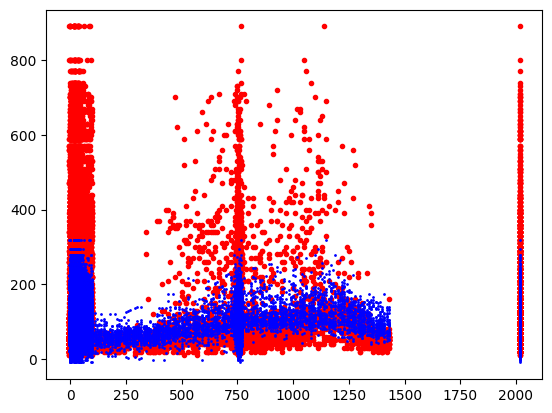

In [26]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [51]:
ridge_optimal = GridSearchCV(Ridge(), {'alpha': np.arange(89, 90, 0.01)}).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 89.93000000000048}

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [52]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_result = ridge.predict(X_test)
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge.score(X_test, y_test)}',
      sep='\n')
ridge.coef_

MAE: 53.17338190293094
RMSE: 8726.522039071657
MSE: 93.41585539442251
MAPE: 0.6171876408658834
R^2: 0.1563919633344717


array([ 1.96148741e+00, -7.91202498e+00,  1.33265650e+01, -1.28954168e+01,
       -1.08703483e+01,  2.68738384e+01,  5.51233741e+00, -2.36357112e+00,
       -3.32265113e+00, -1.60087024e+00,  3.68644830e-02,  5.69400566e+00,
       -1.33301986e-01, -8.14056630e-01, -1.38005288e+00,  6.67272354e+00,
       -4.05335701e+00, -8.38883141e+00, -1.94551489e-01, -2.97203989e+00,
       -4.27296125e-02,  5.95073604e-01,  2.07905445e+00,  2.15370925e-01,
       -7.37120791e-01,  6.18312823e-02, -1.16182324e+01,  0.00000000e+00,
        1.55210846e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [55]:
lasso_optimal = GridSearchCV(Lasso(), {'alpha': np.arange(0.01, 0.1, 0.01)}).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.09}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [56]:
lasso = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_predict = lasso.predict(X_test)
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {lasso.score(X_test, y_test)}',
      sep='\n')
lasso.coef_

MAE: 53.173268490041785
RMSE: 8725.020855507486
MSE: 93.4078200982524
MAPE: 0.7117322377297667
R^2: 0.15653708535600264


array([ 1.95667977e+00, -8.05713700e+00,  1.33935455e+01, -1.31493280e+01,
       -1.10059518e+01,  2.72376953e+01,  5.40460861e+00, -2.25041100e+00,
       -3.23051067e+00, -1.46034110e+00,  3.45214977e-02,  5.63287236e+00,
       -1.33093733e-01, -5.85906490e-01, -1.40515337e+00,  6.53783913e+00,
       -4.04474960e+00, -8.64723569e+00, -1.97048462e-01, -3.02359366e+00,
       -4.63524016e-02,  5.73755588e-01,  2.04324302e+00,  2.16019494e-01,
       -5.73147801e-01,  4.81939683e-02, -1.19336611e+01,  0.00000000e+00,
        1.55486826e-02])

# <b>Полиномиальная регрессия</b>

## Обычная полиномиальная регрессия (без гиппер параметра).

In [76]:
polynomial_regression = PolynomialFeatures(3).fit_transform(X_train)
polynomial_regression

array([[1.00000000e+00, 1.00000000e+01, 1.69633333e+01, ...,
        4.55196672e+09, 2.52887040e+09, 1.40492800e+09],
       [1.00000000e+00, 2.00000000e+01, 2.25000000e+01, ...,
        3.49526016e+09, 1.49103360e+09, 6.36056000e+08],
       [1.00000000e+00, 0.00000000e+00, 2.12000000e+01, ...,
        3.69847296e+09, 1.66944960e+09, 7.53571000e+08],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.93900000e+01, ...,
        3.61718784e+09, 1.59687360e+09, 7.04969000e+08],
       [1.00000000e+00, 1.00000000e+01, 2.12900000e+01, ...,
        4.10489856e+09, 2.05652160e+09, 1.03030100e+09],
       [1.00000000e+00, 0.00000000e+00, 2.51000000e+01, ...,
        5.08032000e+09, 3.15000000e+09, 1.95312500e+09]])

In [77]:
line_regression_for_polinom = LinearRegression().fit(polynomial_regression, y_train)

In [78]:
y_predict = line_regression_for_polinom.predict(PolynomialFeatures(3).fit_transform(X_test))
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {line_regression_for_polinom.score(PolynomialFeatures(3).fit_transform(X_test), y_test)}',
      sep='\n')
lasso.coef_

MAE: 99.21335158937586
RMSE: 144081.3898235871
MSE: 379.58054457991796
MAPE: 2.193158163298709
R^2: -12.928598111011869


array([ 1.95667977e+00, -8.05713700e+00,  1.33935455e+01, -1.31493280e+01,
       -1.10059518e+01,  2.72376953e+01,  5.40460861e+00, -2.25041100e+00,
       -3.23051067e+00, -1.46034110e+00,  3.45214977e-02,  5.63287236e+00,
       -1.33093733e-01, -5.85906490e-01, -1.40515337e+00,  6.53783913e+00,
       -4.04474960e+00, -8.64723569e+00, -1.97048462e-01, -3.02359366e+00,
       -4.63524016e-02,  5.73755588e-01,  2.04324302e+00,  2.16019494e-01,
       -5.73147801e-01,  4.81939683e-02, -1.19336611e+01,  0.00000000e+00,
        1.55486826e-02])

## Полиномиальная регрессия (без гиппер параметра).

### Полиномиальная регрессия - подборка гиппер параметра $\alpha$

In [ ]:
lasso_optimal = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(3).fit_transform(X_train), y_train)
lasso_optimal.best_params_